# Project Review Plan

## Project Objectives
The primary objective of this project is to build and compare predictive classification models to determine the **status** of sales orders (e.g., "received", "complete") based on various customer, product, and transaction features. By identifying key factors influencing sales order outcomes, the project aims to improve sales processes and decision-making.

## Project Aim
The aim of this project is to:

1. **Understand Influential Factors**:
   Analyze how customer demographics, product categories, payment methods, and order details affect sales order status.

2. **Develop Predictive Models**:
   Use advanced classification techniques to accurately predict the order status and identify high-impact variables.

3. **Support Actionable Insights**:
   Provide data-driven recommendations for optimizing inventory, enhancing customer experiences, and improving operational efficiency.

---

## Sales Dataset Overview

### Target Variable
- **`status`**: A qualitative variable suitable for classification tasks (e.g., "received", "complete").

### Predictor Variables

#### Categorical:
- **`category`**: Product type.
- **`payment_method`**: E.g., bank transfer, credit card.
- **`Region`**: Geographical location.
- **`Gender`**: E.g., Male, Female.
- **`Name Prefix`**: E.g., Mr., Ms.

#### Continuous:
- **`price`**: Price per product.
- **`total`**: Order total.
- **`discount_amount`**: Discount applied to the order.
- **`age`**: Customer’s age.
- **`Discount_Percent`**: Percentage discount on the order.

### Dataset Sis.
- Including more than 10,000 rows of data.

---


In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib  inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
sale = pd.read_csv('sales.csv')

C:\Users\ecems\AppData\Local\Temp\ipykernel_18560\727393293.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sale = pd.read_csv('sales.csv')


# EDA

In [5]:
type(sale)

pandas.core.frame.DataFrame

In [6]:
sale.dtypes

order_id             object
order_date           object
status               object
item_id             float64
sku                  object
qty_ordered         float64
price               float64
value               float64
discount_amount     float64
total               float64
category             object
payment_method       object
bi_st                object
cust_id             float64
year                  int64
month                object
ref_num               int64
Name Prefix          object
First Name           object
Middle Initial       object
Last Name            object
Gender               object
age                 float64
full_name            object
E Mail               object
Customer Since       object
SSN                  object
Phone No.            object
Place Name           object
County               object
City                 object
State                object
Zip                   int64
Region               object
User Name            object
Discount_Percent    

In [7]:
sale.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [8]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [9]:
sale.shape

(286392, 36)

In [10]:
sale.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


In [11]:
sale.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [12]:
sale.isnull().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

In [13]:
sale.duplicated().sum()

0

<Axes: title={'center': 'Distribution of Status'}, xlabel='status'>

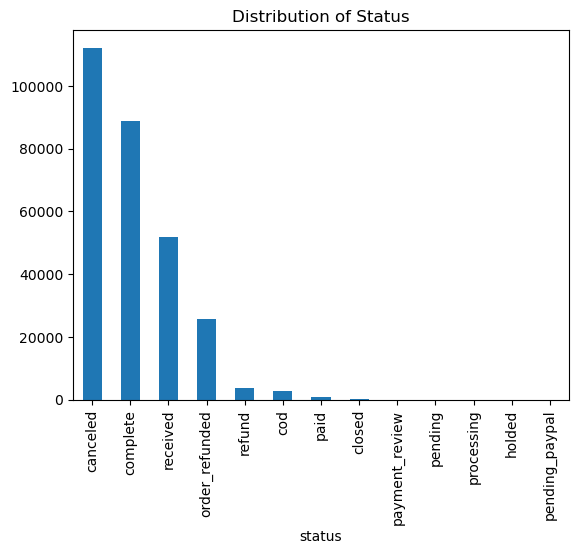

In [14]:
sale['status'].value_counts().plot(kind='bar', title='Distribution of Status')

In [15]:
sale[['category', 'payment_method', 'Region']].nunique()

category          15
payment_method    13
Region             4
dtype: int64

Text(0.5, 1.0, 'Payment Method Distribution')

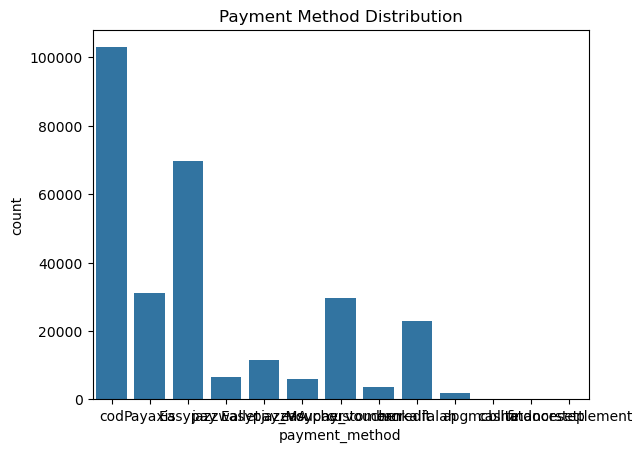

In [16]:
sns.countplot(data=sale, x='payment_method')
plt.title('Payment Method Distribution')

<Axes: xlabel='payment_method'>

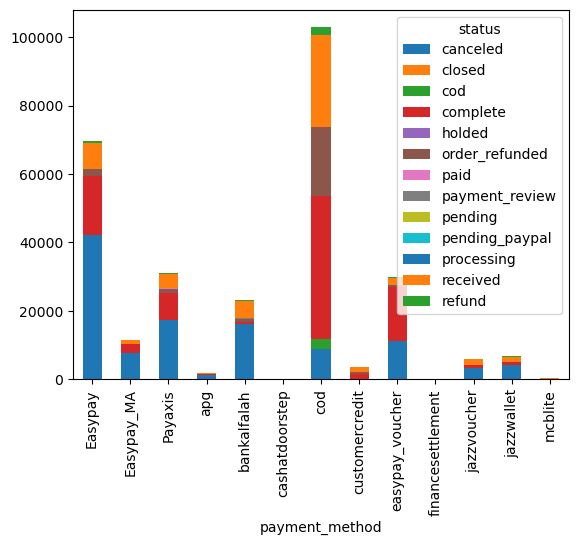

In [17]:
pd.crosstab(sale['payment_method'], sale['status']).plot(kind='bar', stacked=True)

<Axes: ylabel='price'>

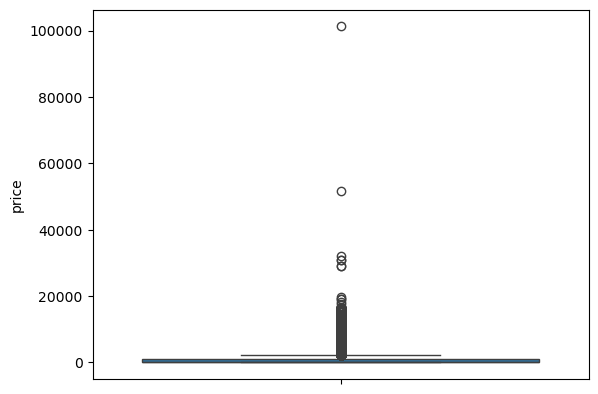

In [18]:
sns.boxplot(data=sale, y='price')

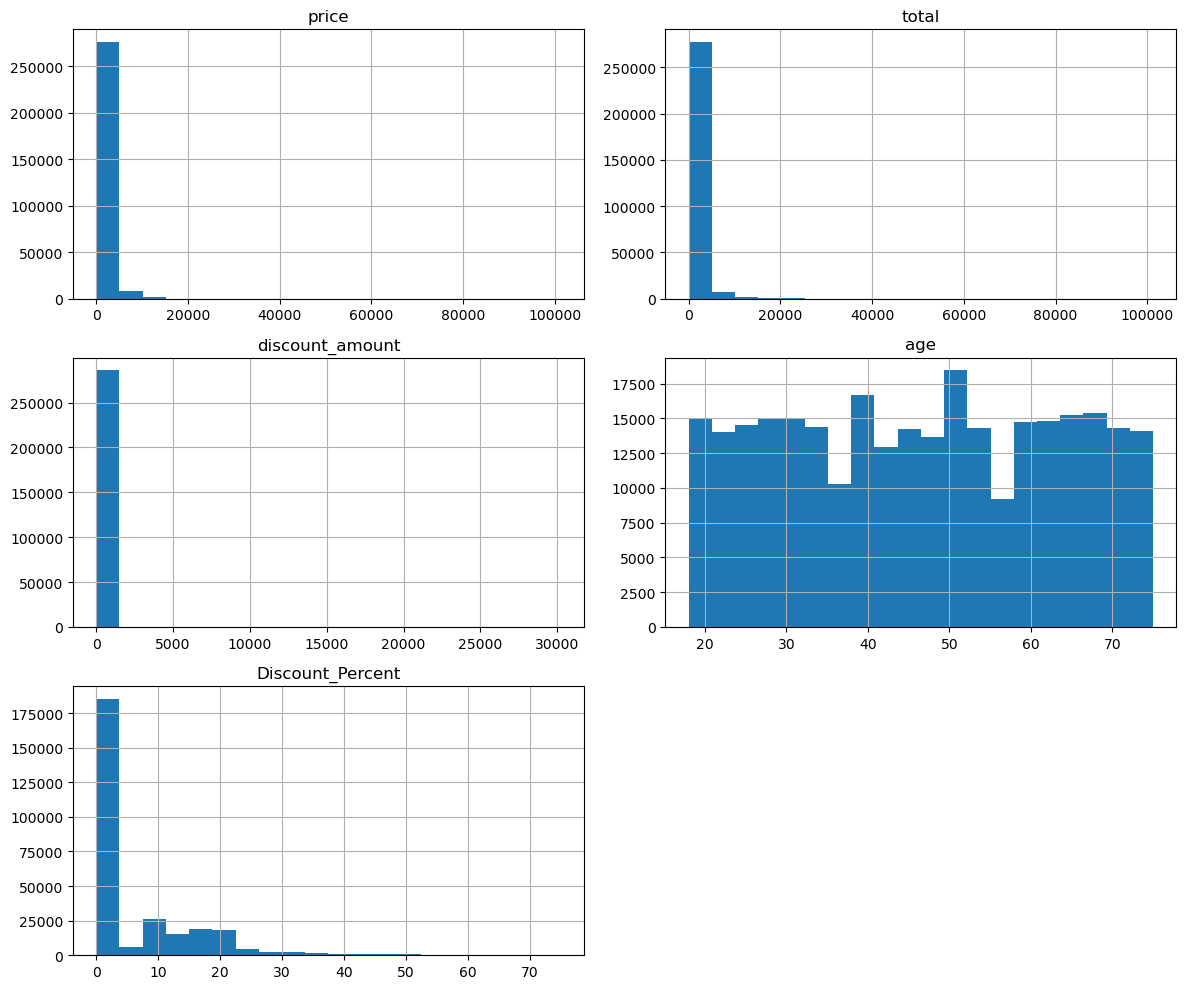

In [19]:
# Define numerical columns in the sales dataset
numerical_columns = ['price', 'total', 'discount_amount', 'age', 'Discount_Percent']

# Plot histograms for numerical columns
sale[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


In [20]:
numerical_columns = ['price', 'total', 'discount_amount', 'age', 'Discount_Percent']
correlation_matrix = sale[numerical_columns].corr()
correlation_matrix

,price,total,discount_amount,age,Discount_Percent
price,1.000000,0.770518,0.241494,-0.007935,0.053462
total,0.770518,1.000000,0.292218,-0.003209,0.026287
discount_amount,0.241494,0.292218,1.000000,0.000782,0.426131
age,-0.007935,-0.003209,0.000782,1.000000,-0.001719
Discount_Percent,0.053462,0.026287,0.426131,-0.001719,1.000000


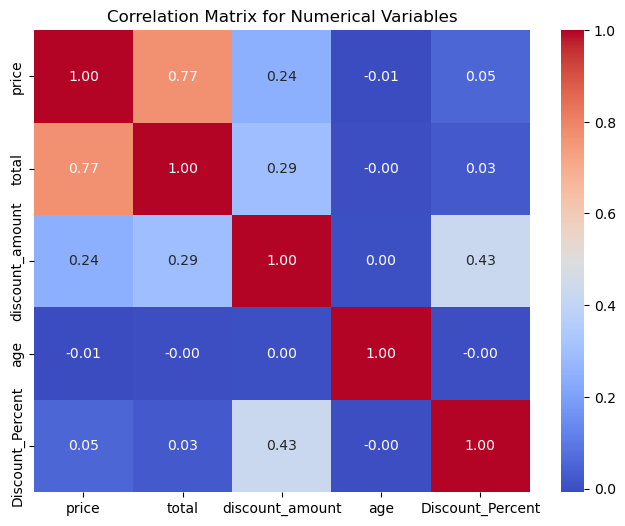

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

## Data Preprocessing

In [23]:
# Categorical Variables
categorical_columns = ['category', 'payment_method', 'Region', 'Gender', 'Name Prefix']
encoded_data = pd.get_dummies(sale[categorical_columns], drop_first=True)

In [24]:
numerical_columns = ['price', 'total', 'discount_amount', 'age', 'Discount_Percent']
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(sale[numerical_columns]),
    columns=numerical_columns
)

In [25]:
preprocessed_data = pd.concat(
    [scaled_data, encoded_data, sale[['status']]],  # Include target variable
    axis=1
)

In [26]:
preprocessed_data.head()

,price,total,discount_amount,age,Discount_Percent,category_Beauty & Grooming,category_Books,category_Computing,category_Entertainment,category_Health & Sports,...,Region_South,Region_West,Gender_M,Name Prefix_Drs.,Name Prefix_Hon.,Name Prefix_Mr.,Name Prefix_Mrs.,Name Prefix_Ms.,Name Prefix_Prof.,status
0,-0.437196,0.495146,-0.272654,-0.209259,-0.600894,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,received
1,-0.477902,-0.315511,-0.272654,-0.209259,-0.600894,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,received
2,-0.402748,0.193267,-0.272654,-0.209259,-0.600894,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,complete
3,-0.442937,-0.089052,-0.272654,-0.209259,-0.600894,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,complete
4,-0.431455,-0.360934,-0.272654,-0.209259,-0.600894,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,received


## Splitting the Dataset

In [28]:
X = preprocessed_data.drop(columns=['status'])  # Features
y = preprocessed_data['status']

In [29]:
y_binary = y.apply(lambda x: 1 if x == 'complete' else 0)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

In [31]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (200474, 41)
X_test shape: (85918, 41)
y_train shape: (200474,)
y_test shape: (85918,)


## Feature Engineering

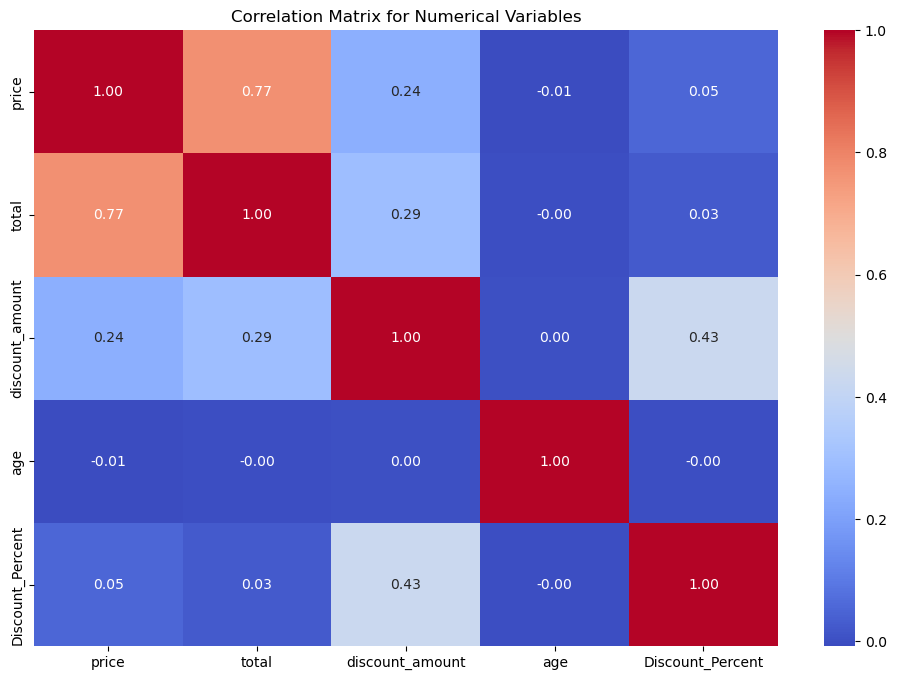

In [33]:
numerical_data = preprocessed_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

# Model Building

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Logistic Regression

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [38]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81     59227
           1       0.57      0.18      0.27     26691

    accuracy                           0.70     85918
   macro avg       0.65      0.56      0.54     85918
weighted avg       0.67      0.70      0.65     85918

Confusion Matrix:
 [[55641  3586]
 [21876  4815]]
ROC-AUC Score: 0.7213451723731865


In [39]:
mse = mean_squared_error(y_test, y_prob)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_prob)  # Mean Absolute Error
r2 = r2_score(y_test, y_prob)  # R-squared Score

In [40]:
print("\nMean Squared Error (MSE):", mse)
print("\nMean Absolute Error (MAE):", mae)
print("\nR-squared Score (R²):", r2)


Mean Squared Error (MSE): 0.18589958634262785

Mean Absolute Error (MAE): 0.37237046423539893

R-squared Score (R²): 0.13191518182291384


## Decision Trees

In [42]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42) 
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

In [43]:
classification_report_dt = classification_report(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

In [44]:
mse_dt = mean_squared_error(y_test, y_prob_dt)
mae_dt = mean_absolute_error(y_test, y_prob_dt)
r2_dt = r2_score(y_test, y_prob_dt)

In [45]:
print("Decision Tree Classification Report:\n", classification_report_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)
print("Decision Tree ROC-AUC Score:", roc_auc_dt)

print("\nMean Squared Error (MSE):", mse_dt)
print("\nMean Absolute Error (MAE):", mae_dt)
print("\nR-squared Score (R²):", r2_dt)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82     59227
           1       0.68      0.13      0.21     26691

    accuracy                           0.71     85918
   macro avg       0.70      0.55      0.52     85918
weighted avg       0.70      0.71      0.63     85918

Decision Tree Confusion Matrix:
 [[57663  1564]
 [23338  3353]]
Decision Tree ROC-AUC Score: 0.7179665745857362

Mean Squared Error (MSE): 0.1836915897842783

Mean Absolute Error (MAE): 0.36733653798285254

R-squared Score (R²): 0.14222573887470757


## Random Forest

In [47]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42) 
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [48]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [49]:
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

In [50]:
mse_rf = mean_squared_error(y_test, y_prob_rf)
mae_rf = mean_absolute_error(y_test, y_prob_rf)
r2_rf = r2_score(y_test, y_prob_rf)

In [51]:
print("Random Forest Classification Report:\n", classification_report_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)
print("Random Forest ROC-AUC Score:", roc_auc_rf)

print("\nMean Squared Error (MSE):", mse_rf)
print("\nMean Absolute Error (MAE):", mae_rf)
print("\nR-squared Score (R²):", r2_rf)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82     59227
           1       0.68      0.17      0.28     26691

    accuracy                           0.72     85918
   macro avg       0.70      0.57      0.55     85918
weighted avg       0.71      0.72      0.65     85918

Random Forest Confusion Matrix:
 [[57059  2168]
 [22056  4635]]
Random Forest ROC-AUC Score: 0.7642664510560937

Mean Squared Error (MSE): 0.1762251227681962

Mean Absolute Error (MAE): 0.3646779087038364

R-squared Score (R²): 0.17709147897449906


## lasso regression

In [53]:
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [54]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [55]:
print("Mean Squared Error (MSE):", mse_lasso)
print("Mean Absolute Error (MAE):", mae_lasso)
print("R-squared Score (R²):", r2_lasso)

Mean Squared Error (MSE): 0.18703804038444308
Mean Absolute Error (MAE): 0.378423821400112
R-squared Score (R²): 0.12659900716467298


## Gradient Boosting

In [57]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [58]:
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

In [59]:
classification_report_gb = classification_report(y_test, y_pred_gb)
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

In [60]:
mse_gb = mean_squared_error(y_test, y_prob_gb)
mae_gb = mean_absolute_error(y_test, y_prob_gb)
r2_gb = r2_score(y_test, y_prob_gb)

In [61]:
print("Gradient Boosting Classification Report:\n", classification_report_gb)
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix_gb)
print("Gradient Boosting ROC-AUC Score:", roc_auc_gb)
print("\nGradient Boosting Mean Squared Error (MSE):", mse_gb)
print("Gradient Boosting Mean Absolute Error (MAE):", mae_gb)
print("Gradient Boosting R-squared Score (R²):", r2_gb)

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82     59227
           1       0.66      0.18      0.28     26691

    accuracy                           0.72     85918
   macro avg       0.69      0.57      0.55     85918
weighted avg       0.70      0.72      0.66     85918

Gradient Boosting Confusion Matrix:
 [[56774  2453]
 [21851  4840]]
Gradient Boosting ROC-AUC Score: 0.75384799503821

Gradient Boosting Mean Squared Error (MSE): 0.17718975078936364
Gradient Boosting Mean Absolute Error (MAE): 0.3606091496094183
Gradient Boosting R-squared Score (R²): 0.17258700988536246


## Neural Network

In [63]:
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [64]:
y_pred_nn = nn.predict(X_test)
y_prob_nn = nn.predict_proba(X_test)[:, 1]

In [65]:
classification_report_nn = classification_report(y_test, y_pred_nn)
confusion_matrix_nn = confusion_matrix(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_prob_nn)

In [66]:
mse_nn = mean_squared_error(y_test, y_prob_nn)
mae_nn = mean_absolute_error(y_test, y_prob_nn)
r2_nn = r2_score(y_test, y_prob_nn)

In [67]:
print("Neural Network Classification Report:\n", classification_report_nn)
print("Neural Network Confusion Matrix:\n", confusion_matrix_nn)
print("Neural Network ROC-AUC Score:", roc_auc_nn)
print("\nNeural Network Mean Squared Error (MSE):", mse_nn)
print("Neural Network Mean Absolute Error (MAE):", mae_nn)
print("Neural Network R-squared Score (R2):", r2_nn)

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80     59227
           1       0.55      0.47      0.51     26691

    accuracy                           0.72     85918
   macro avg       0.66      0.65      0.65     85918
weighted avg       0.71      0.72      0.71     85918

Neural Network Confusion Matrix:
 [[49100 10127]
 [14215 12476]]
Neural Network ROC-AUC Score: 0.7661026630048815

Neural Network Mean Squared Error (MSE): 0.17531774531920527
Neural Network Mean Absolute Error (MAE): 0.34910586403375793
Neural Network R-squared Score (R2): 0.18132860829426822


##  Hyperparameter Tuning and Cross Validation

In [129]:
sample_size = int(len(X_train) * 0.1)  # Use 10% of training data
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train, train_size=sample_size, stratify=y_train, random_state=42
)

In [131]:
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search_rf.fit(X_train_sample, y_train_sample)
print("Random Forest Best Parameters:", random_search_rf.best_params_)
print("Random Forest Best ROC-AUC Score:", random_search_rf.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Random Forest Best ROC-AUC Score: 0.7583550721922245


In [133]:
gb_param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
random_search_gb = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search_gb.fit(X_train_sample, y_train_sample)
print("Gradient Boosting Best Parameters:", random_search_gb.best_params_)
print("Gradient Boosting Best ROC-AUC Score:", random_search_gb.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Gradient Boosting Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Gradient Boosting Best ROC-AUC Score: 0.7545071289818434


In [134]:
dt_param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search_dt.fit(X_train_sample, y_train_sample)
print("Decision Tree Best Parameters:", random_search_dt.best_params_)
print("Decision Tree Best ROC-AUC Score:", random_search_dt.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Decision Tree Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Decision Tree Best ROC-AUC Score: 0.7266809366745273


In [135]:
log_reg_param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
random_search_log_reg = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    log_reg_param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search_log_reg.fit(X_train_sample, y_train_sample)
print("Logistic Regression Best Parameters:", random_search_log_reg.best_params_)
print("Logistic Regression Best ROC-AUC Score:", random_search_log_reg.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Logistic Regression Best Parameters: {'solver': 'lbfgs', 'C': 100}
Logistic Regression Best ROC-AUC Score: 0.720570145497008


In [137]:
nn_param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}
random_search_nn = RandomizedSearchCV(
    MLPClassifier(max_iter=200, random_state=42),
    nn_param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search_nn.fit(X_train_sample, y_train_sample)
print("Neural Network Best Parameters:", random_search_nn.best_params_)
print("Neural Network Best ROC-AUC Score:", random_search_nn.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Neural Network Best Parameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'activation': 'logistic'}
Neural Network Best ROC-AUC Score: 0.7351755958310141


In [140]:
# Gradient Boosting
best_gb = random_search_gb.best_estimator_
y_prob_gb = best_gb.predict_proba(X_test)[:, 1]
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)

# Neural Network
best_nn = random_search_nn.best_estimator_
y_prob_nn = best_nn.predict_proba(X_test)[:, 1]
roc_auc_nn = roc_auc_score(y_test, y_prob_nn)

# Random Forest
best_rf = random_search_rf.best_estimator_
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Decision Tree
best_dt = random_search_dt.best_estimator_
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Logistic Regression
best_log_reg = random_search_log_reg.best_estimator_
y_prob_log_reg = best_log_reg.predict_proba(X_test)[:, 1]
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

# Print Results
print("\nModel Evaluation Results on Test Set:")
print(f"Gradient Boosting ROC-AUC: {roc_auc_gb}")
print(f"Neural Network ROC-AUC: {roc_auc_nn}")
print(f"Random Forest ROC-AUC: {roc_auc_rf}")
print(f"Decision Tree ROC-AUC: {roc_auc_dt}")
print(f"Logistic Regression ROC-AUC: {roc_auc_log_reg}")

# Best Model Selection
models = {
    'Gradient Boosting': roc_auc_gb,
    'Neural Network': roc_auc_nn,
    'Random Forest': roc_auc_rf,
    'Decision Tree': roc_auc_dt,
    'Logistic Regression': roc_auc_log_reg
}
best_model_name = max(models, key=models.get)
print(f"\nBest Model: {best_model_name} with ROC-AUC: {models[best_model_name]}")



Model Evaluation Results on Test Set:
Gradient Boosting ROC-AUC: 0.7636014792216557
Neural Network ROC-AUC: 0.7373365884455059
Random Forest ROC-AUC: 0.767886535288959
Decision Tree ROC-AUC: 0.7389701344312786
Logistic Regression ROC-AUC: 0.7225721813681324

Best Model: Random Forest with ROC-AUC: 0.767886535288959


In [ ]:
# Random Forest Feature Importance
rf_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_feature_importances)

# Gradient Boosting Feature Importance
gb_feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nGradient Boosting Feature Importance:")
print(gb_feature_importances)

# Visualize Feature Importance for Random Forest
rf_feature_importances.plot(kind='barh', x='Feature', y='Importance', figsize=(10, 6), title="Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

# Visualize Feature Importance for Gradient Boosting
gb_feature_importances.plot(kind='barh', x='Feature', y='Importance', figsize=(10, 6), title="Gradient Boosting Feature Importance")
plt.gca().invert_yaxis()
plt.show()



Logistic Regression Feature Coefficients:
                             Feature  Coefficient
26    payment_method_easypay_voucher     1.097414
25     payment_method_customercredit     0.908606
24                payment_method_cod     0.888537
30            payment_method_mcblite     0.608278
2                    discount_amount     0.254526
4                   Discount_Percent     0.232792
40                 Name Prefix_Prof.     0.139724
23     payment_method_cashatdoorstep     0.129348
38                  Name Prefix_Mrs.     0.112773
34                          Gender_M     0.097411
39                   Name Prefix_Ms.     0.084274
35                  Name Prefix_Drs.     0.068259
32                      Region_South     0.013934
3                                age     0.006446
36                  Name Prefix_Hon.     0.002517
27  payment_method_financesettlement     0.000000
33                       Region_West    -0.000016
20            payment_method_Payaxis    -0.034220
31     

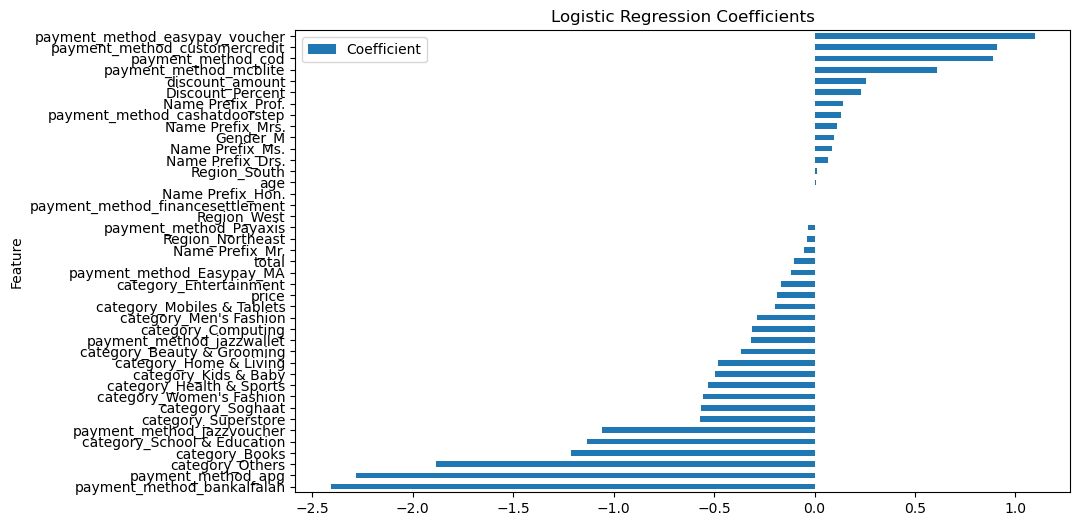

In [141]:
# Logistic Regression Feature Importance
log_reg_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Feature Coefficients:")
print(log_reg_coefficients)

# Visualize Coefficients
log_reg_coefficients.plot(kind='barh', x='Feature', y='Coefficient', figsize=(10, 6), title="Logistic Regression Coefficients")
plt.gca().invert_yaxis()
plt.show()
